# Linear Regression
You should build a machine learning pipeline using a linear regression model. In particular, you should do the following:
- Load the `housing` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). 
- Conduct data exploration, data preprocessing, and feature engineering if necessary. 
- Train and test a linear regression model using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

## Business Problem Statement
lkjjdkfjd
kdjkfd
- hdfhdkl
- knfkkjdj


## Importing Required Libraries

In [24]:
import pandas as pd
import numpy as np
import sklearn.model_selection
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.compose
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import sklearn.svm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
# This is a test

## Data Collection

In [25]:

df = pd.read_csv("https://raw.githubusercontent.com/m-mahdavi/teaching/main/datasets/housing.csv")
df.head(10)

,id,price,area,bedrooms,bathrooms,stories,stories.1,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0
5,5,10850000,7500,3,3,1,1,0,1,0,1,2,1,0.5
6,6,10150000,8580,4,3,4,1,0,0,0,1,2,1,0.5
7,7,10150000,16200,5,3,2,1,0,0,0,0,0,0,0.0
8,8,9870000,8100,4,1,2,1,1,1,0,1,2,1,1.0
9,9,9800000,5750,3,2,4,1,1,0,0,1,1,1,0.0


In [10]:
df.shape

(545, 14)

In [11]:
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=.25)

print("df size:",df.shape)
print("df train size:",df_train.shape)
print("df test size:",df_test.shape)

df size: (545, 14)
df train size: (408, 14)
df test size: (137, 14)


## Data Exploration

In [12]:
df_train.dtypes

id                    int64
price                 int64
area                  int64
bedrooms              int64
bathrooms             int64
stories               int64
stories.1             int64
guestroom             int64
basement              int64
hotwaterheating       int64
airconditioning       int64
parking               int64
prefarea              int64
furnishingstatus    float64
dtype: object

/Users/jasonjoelpinto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bedrooms', ylabel='Count'>

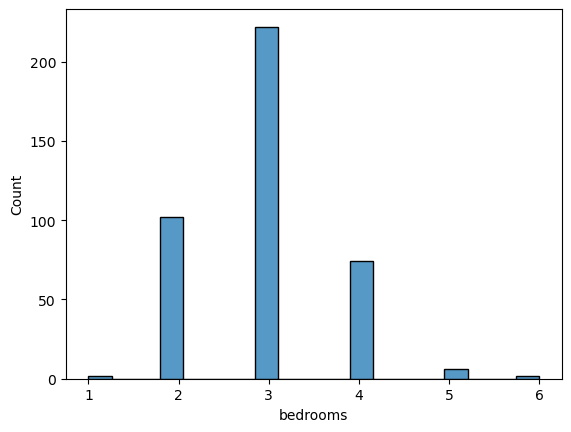

In [13]:
sns.histplot(data=df_train, x="bedrooms")

In [14]:
for column in df_train:
    new = df_train[column].value_counts()
    print(new)


id
373    1
541    1
135    1
114    1
11     1
      ..
537    1
113    1
281    1
181    1
67     1
Name: count, Length: 408, dtype: int64
price
3500000     13
4900000     11
4200000     11
5950000      8
3290000      7
            ..
2695000      1
4165000      1
4753000      1
12215000     1
6895000      1
Name: count, Length: 190, dtype: int64
area
6000    19
3000    12
4500    10
4000     7
5500     7
        ..
6050     1
4632     1
6300     1
1650     1
3650     1
Name: count, Length: 239, dtype: int64
bedrooms
3    222
2    102
4     74
5      6
6      2
1      2
Name: count, dtype: int64
bathrooms
1    304
2     98
3      5
4      1
Name: count, dtype: int64
stories
2    176
1    172
4     33
3     27
Name: count, dtype: int64
stories.1
1    354
0     54
Name: count, dtype: int64
guestroom
0    332
1     76
Name: count, dtype: int64
basement
0    270
1    138
Name: count, dtype: int64
hotwaterheating
0    390
1     18
Name: count, dtype: int64
airconditioning
0    278
1    13

In [15]:
for column in df_train:
    new = df_train[column].unique()
    print(f"Column Name : {column}")
    print(new)

Column Name : id
[373  47 519 121 210 310 417 298 203 429  32 433 348 411   6 512  33 234
 124 207 449 141 322 318 112 149 403 471 132  66  40 397 332 482 253 251
 291 330 145 119 193 325 528 380 198   4 304 301 544 243 486 206 333 427
 217 385 323 476 115 312 491 105 418 470  92 230 134 415 116 189  83 194
  63 409  86 495 259 455 197 364 245  78  46 384 399 515 508 241 472 144
 244  68 202 222 457 467 405 273 313  38 452 129 453  88 530 462 342 404
 502  62  95 503 395 500 328 428 326  84 438 337 199 354 392 168 505 276
 186 414  14 490 181 281 113 537   9 255 120   3 225 185 522 247 306 520
 250 173 496 311 382  71 231 492 534 446   1  48 166 504 108 437 208 271
  94  52 261 183 156  93 474  35 351 196 423  55  50  21 109  74 277 443
 290 200 494 233 177 309 205 389  99 489 420 477 151   0 150 266 176 445
   7 387 268 398 110 381 525 533 535 358 123  16  30 213 226 167 367 441
 118 316 171 439  77 278 510 485  19 260 536  36 460 180 267  44 465 100
 262 242  42  31 170 435  39 274 2

## Data Pre-Processing

In [16]:
x_train = df_train.drop(['price'], axis=1)
y_train = df_train['price']
x_test = df_test.drop(['price'], axis=1)
y_test = df_test['price']

print(f"X Train size: {x_train.shape}")
print(f"Y Train size: {y_train.shape}")
print(f"X Test size: {x_test.shape}")
print(f"Y Train size: {y_test.shape}")

print(x_test)

X Train size: (408, 13)
Y Train size: (408,)
X Test size: (137, 13)
Y Train size: (137,)
      id  area  bedrooms  bathrooms  stories  stories.1  guestroom  basement  \
386  386  3850         3          1        1          1          0         0   
359  359  3600         3          1        1          1          0         0   
218  218  4815         2          1        1          1          0         0   
308  308  4046         3          1        2          1          0         1   
305  305  3450         3          1        2          1          0         0   
..   ...   ...       ...        ...      ...        ...        ...       ...   
131  131  5828         4          1        4          1          1         0   
440  440  3640         4          1        2          1          0         1   
130  130  4800         3          1        1          1          1         1   
288  288  5040         3          1        2          1          0         1   
454  454  4500         3       

## Feature Engineering

In [17]:
numerical_attributes = x_train.select_dtypes(include=["int64","float64"])
numerical_attributes



,id,area,bedrooms,bathrooms,stories,stories.1,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
373,373,3000,2,1,2,1,0,0,0,1,0,0,1.0
47,47,6600,3,1,4,1,0,0,0,1,3,1,1.0
519,519,4840,2,1,2,1,0,0,0,0,0,0,0.0
121,121,7231,3,1,2,1,1,1,0,1,0,1,0.5
210,210,4646,3,1,2,1,1,1,0,0,2,0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,192,6600,3,1,1,1,1,1,0,0,0,1,1.0
87,87,3960,3,1,1,1,0,1,0,0,2,0,0.5
240,240,3840,3,1,2,1,0,0,0,0,1,1,0.5
388,388,3650,3,1,2,1,0,0,0,0,0,0,0.0


In [18]:

scaler = StandardScaler()
scaler.fit(x_train)
scaler.transform(x_train)
scaler.transform(x_test)

print(f"X Train size: {x_train.shape}")
print(f"X Test size: {x_test.shape}")





X Train size: (408, 13)
X Test size: (137, 13)


In [19]:
x_train.head(10)

,id,area,bedrooms,bathrooms,stories,stories.1,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
373,373,3000,2,1,2,1,0,0,0,1,0,0,1.0
47,47,6600,3,1,4,1,0,0,0,1,3,1,1.0
519,519,4840,2,1,2,1,0,0,0,0,0,0,0.0
121,121,7231,3,1,2,1,1,1,0,1,0,1,0.5
210,210,4646,3,1,2,1,1,1,0,0,2,0,0.5
310,310,5985,3,1,1,1,0,1,0,0,0,0,0.5
417,417,3640,2,1,1,1,0,0,0,0,0,0,1.0
298,298,5800,3,1,1,1,0,0,1,0,2,0,0.5
203,203,5400,4,1,2,1,0,0,0,0,0,0,0.5
429,429,4775,4,1,2,1,0,0,0,0,0,0,0.0


## Model Training

In [20]:
model = sklearn.svm.SVC()
model.fit(x_train, y_train)


SVC()

In [21]:
support_vectors = model.support_vectors_
gram_matrix = np.dot(support_vectors, support_vectors.T)


## Model Assessment

In [22]:
y_predicted = model.predict(x_test)
MSE = mean_squared_error(y_test, y_predicted)
MAE = mean_absolute_error(y_test, y_predicted)
R2 = r2_score(y_test, y_predicted)

print(f" MSE : {MSE}")
print(f" MAE : {MAE}")
print(f" R2  : {R2}")

 MSE : 2169679673357.6643
 MAE : 1094018.2481751824
 R2  : 0.26828190726192747


## Conclusion